**Valid Parentheses**

You are given a string s consisting of the following characters: '(', ')', '{', '}', '[' and ']'.

The input string s is valid if and only if:

Every open bracket is closed by the same type of close bracket.
Open brackets are closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.
Return true if s is a valid string, and false otherwise.

Example 1:

Input: s = "[]"

Output: true

Example 2:

Input: s = "([{}])"

Output: true

Example 3:

Input: s = "[(])"

Output: false
Explanation: The brackets are not closed in the correct order.

In [2]:
def isvalid(s):
    stack = []
    closetoopen = {')':'(',']':'[','}':'{'}

    for c in s:
        if c in closetoopen:
            if stack and stack[-1] == closetoopen[c]:
                stack.pop()
            else:
                return False
        else:
            if c in closetoopen.values(): #this ignores other characters apart from paranthesis
                stack.append(c)
    return True if not stack else False
isvalid("({p})")

True

**Minimum Stack**

Design a stack class that supports the push, pop, top, and getMin operations.

MinStack() initializes the stack object.
void push(int val) pushes the element val onto the stack.
void pop() removes the element on the top of the stack.
int top() gets the top element of the stack.
int getMin() retrieves the minimum element in the stack.
Each function should run in 
O
(
1
)
O(1) time.

Example 1:

Input: ["MinStack", "push", 1, "push", 2, "push", 0, "getMin", "pop", "top", "getMin"]

Output: [null,null,null,null,0,null,2,1]

Explanation:

MinStack minStack = new MinStack();

minStack.push(1);

minStack.push(2);

minStack.push(0);

minStack.getMin(); // return 0

minStack.pop();

minStack.top();    // return 2

minStack.getMin(); // return 1

In [1]:
# with O(1) time complexity
class MinStack:
    def __init__(self):
        self.stack = []
        self.minstack = []
        #self.val = float("inf")
    def push(self,val):
        self.stack.append(val)
        val = min(val, self.minstack[-1] if self.minstack else val)
        self.minstack.append(val)
    def pop(self):
        self.stack.pop()
        self.minstack.pop()
    def top(self):
        return self.stack[-1]
    def getMin(self):
        return self.minstack[-1]

In [ ]:
#test case code for the above code
# The corrected class definition (from above) must be run before this block

def test_min_stack(test_case: list):
    """
    Executes a sequence of MinStack operations based on a test case list.
    
    Args:
        test_case: A list of strings (method names) and ints (arguments).
    """
    # 1. Initialize the class and the results list
    instance = None
    results = []
    
    # 2. Iterate through the test case
    i = 0
    while i < len(test_case):
        item = test_case[i]
        
        if item == "MinStack":
            # Instantiate the class
            instance = MinStack()
            results.append(None) # Constructor call always returns None
            print(f"-> MinStack() initialized")
            i += 1
            
        elif item == "push":
            # The next item is the argument
            arg = test_case[i + 1]
            instance.push(arg)
            results.append(None)
            print(f"-> push({arg}) | Stack: {instance.stack} | MinStack: {instance.minstack}")
            i += 2
            
        elif item == "pop":
            instance.pop()
            results.append(None)
            print(f"-> pop() | Stack: {instance.stack} | MinStack: {instance.minstack}")
            i += 1
            
        elif item == "top":
            result = instance.top()
            results.append(result)
            print(f"-> top() = {result}")
            i += 1
            
        elif item == "getMin":
            result = instance.getMin()
            results.append(result)
            print(f"-> getMin() = {result}")
            i += 1
            
        else:
            # Skip argument values when not following 'push'
            i += 1
            
    return results

# --- Run the Test ---
test_case = ["MinStack", "push", 1, "push", 2, "push", 0, "getMin", "pop", "top", "getMin"]
final_results = test_min_stack(test_case)

print("\n--- Final Results (Expected Outputs) ---")
print(final_results)

-> MinStack() initialized
-> push(1) | Stack: [1] | MinStack: [1]
-> push(2) | Stack: [1, 2] | MinStack: [1, 1]
-> push(0) | Stack: [1, 2, 0] | MinStack: [1, 1, 0]
-> getMin() = 0
-> pop() | Stack: [1, 2] | MinStack: [1, 1]
-> top() = 2
-> getMin() = 1

--- Final Results (Expected Outputs) ---
[None, None, None, None, 0, None, 2, 1]


Two-Stack implementation is generally considered better than the single-stack difference code in terms of readability, simplicity, and safety, even though both achieve the required $O(1)$ time complexity for all operations.

In [24]:
# this is from one stack solution of neetcode
class MinStack:
    def __init__(self):
        self.min = float('inf')
        self.stack = []

    def push(self, val: int) -> None:
        if not self.stack:
            self.stack.append(0)
            self.min = val
        else:
            self.stack.append(val - self.min)
            if val < self.min:
                self.min = val

    def pop(self) -> None:
        if not self.stack:
            return

        pop = self.stack.pop()

        if pop < 0:
            self.min = self.min - pop

    def top(self) -> int:
        top = self.stack[-1]
        if top > 0:
            return top + self.min
        else:
            return self.min

    def getMin(self) -> int:
        return self.min

In [25]:
#test code for the above code
def test_min_stack_single_stack(test_case: list) -> list:
    """
    Executes a sequence of MinStack operations for the single-stack implementation.
    """
    instance = None
    results = []
    i = 0
    
    while i < len(test_case):
        item = test_case[i]
        
        if item == "MinStack":
            instance = MinStack()
            results.append(None)
            print("MinStack() initialized")
            i += 1
            
        elif item == "push":
            arg = test_case[i + 1]
            instance.push(arg)
            results.append(None)
            print(f"-> push({arg}) | Stack: {instance.stack} | Min: {instance.min}")
            i += 2
            
        elif item == "pop":
            # Call pop
            instance.pop()
            results.append(None)
            print(f"-> pop() | Stack: {instance.stack} | Min: {instance.min}")
            i += 1
            
        elif item == "top":
            result = instance.top()
            results.append(result)
            print(f"-> top() = {result}")
            i += 1
            
        elif item == "getMin":
            result = instance.getMin()
            results.append(result)
            print(f"-> getMin() = {result}")
            i += 1
            
        else:
            # Skip argument values when not following a command
            i += 1
            
    return results

test_case = ["MinStack", "push", 1, "push", 2, "push", 0, "getMin", "pop", "top", "getMin"]

print("--- Starting Single-Stack MinStack Test ---")
final_results = test_min_stack_single_stack(test_case)

print("\n--- Final Results (Expected Outputs) ---")
print(final_results)

--- Starting Single-Stack MinStack Test ---
MinStack() initialized
-> push(1) | Stack: [0] | Min: 1
-> push(2) | Stack: [0, 1] | Min: 1
-> push(0) | Stack: [0, 1, -1] | Min: 0
-> getMin() = 0
-> pop() | Stack: [0, 1] | Min: 1
-> top() = 2
-> getMin() = 1

--- Final Results (Expected Outputs) ---
[None, None, None, None, 0, None, 2, 1]


**Evaluate Reverse Polish Notation**

You are given an array of strings tokens that represents a valid arithmetic expression in Reverse Polish Notation.

Return the integer that represents the evaluation of the expression.

The operands may be integers or the results of other operations.
The operators include '+', '-', '*', and '/'.

Assume that division between integers always truncates toward zero.

Example 1:

Input: tokens = ["1","2","+","3","*","4","-"]

Output: 5

In [ ]:
#brute force method -O(n^2) - time complexity
from typing import List
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        while len(tokens) > 1:
            for i in range(len(tokens)):
                if tokens[i] in "+-*/":
                    a = int(tokens[i-2])
                    b = int(tokens[i-1])
                    if tokens[i] == '+':
                        result = a + b
                    elif tokens[i] == '-':
                        result = a - b
                    elif tokens[i] == '*':
                        result = a * b
                    elif tokens[i] == '/':
                        result = int(a / b)
                    tokens = tokens[:i-2] + [str(result)] + tokens[i+1:]
                    break
        return int(tokens[0])

In [3]:
#using stack - O(n) - time complexity
from typing import List
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stack = []
        for c in tokens:
            if c == '+':
                stack.append(stack.pop() + stack.pop())
            elif c =='-':
                a,b = stack.pop(),stack.pop()
                stack.append(b - a)
            elif c == '*':
                stack.append(stack.pop() * stack.pop())
            elif c == '/':
                a,b = stack.pop(),stack.pop()
                stack.append(int(b/a))
            else:
                stack.append(int(c))
        return stack[-1]
c = Solution()
c.evalRPN(["2","1","+","3","*"]) 

9

**Generate Parentheses**

You are given an integer n. Return all well-formed parentheses strings that you can generate with n pairs of parentheses.

Example 1:

Input: n = 1

Output: ["()"]
Example 2:

Input: n = 3

Output: ["((()))","(()())","(())()","()(())","()()()"]
You may return the answer in any order.

Constraints:

1 <= n <= 7

In [ ]:
#using backtracking - stack + recursion - dfs O(4^n/sq(N))
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        stack = []
        res = []

        def backtrack(openN, closedN):
            if openN == closedN == n:
                res.append("".join(stack))
                return

            if openN < n:
                stack.append("(")
                backtrack(openN + 1, closedN)
                stack.pop()
            if closedN < openN:
                stack.append(")")
                backtrack(openN, closedN + 1)
                stack.pop()

        backtrack(0, 0)
        return res
c = Solution()
c.generateParenthesis(2)

['(())', '()()']

In [34]:
#using dynamic programming
class Solution:
    def generateParenthesis(self, n):
        res = [[] for _ in range(n+1)]
        res[0] = [""]

        for k in range(n + 1):
            for i in range(k):
                for left in res[i]:
                    for right in res[k-i-1]:
                        res[k].append("(" + left + ")" + right)

        return res[-1]
c = Solution()
c.generateParenthesis(3)

['()()()', '()(())', '(())()', '(()())', '((()))']

**Word Search**

Given a 2-D grid of characters board and a string word, return true if the word is present in the grid, otherwise return false.

For the word to be present it must be possible to form it with a path in the board with horizontally or vertically neighboring cells. The same cell may not be used more than once in a word.

Example 1:

Input: 

board = [
  
  ["A","B","C","D"],

  ["S","A","A","T"],

  ["A","C","A","E"]
],

word = "CAT"

Output: true

Example 2:

Input: 

board = [
  
  ["A","B","C","D"],

  ["S","A","A","T"],

  ["A","C","A","E"]
],

word = "BAT"

Output: false

In [8]:
# backtracking with hashset, time comeplexity = O(m * 4^n) space complexity = O(n)
class Solution:
    def exist(self, board, word):
        ROWS, COLS = len(board), len(board[0])
        path = set()

        def dfs(r, c, i):
            if i == len(word):
                return True

            if (min(r, c) < 0 or
                r >= ROWS or c >= COLS or
                word[i] != board[r][c] or
                (r, c) in path):
                return False

            path.add((r, c))
            res = (dfs(r + 1, c, i + 1) or
                   dfs(r - 1, c, i + 1) or
                   dfs(r, c + 1, i + 1) or
                   dfs(r, c - 1, i + 1))
            path.remove((r, c))
            return res

        for r in range(ROWS):
            for c in range(COLS):
                if dfs(r, c, 0):
                    return True
        return False
s = Solution()
board = [["A","B","C","D"],["S","A","A","T"],["A","C","A","E"]]
word = "BAT"
s.exist(board,word)    

False

In [6]:
#backtracking with visited array time comeplexity = O(m * 4^n) space complexity = O(n)
class Solution:
    def exist(self, board, word):
        ROWS, COLS = len(board), len(board[0])
        visited = [[False for _ in range(COLS)] for _ in range(ROWS)]

        def dfs(r, c, i):
            if i == len(word):
                return True
            if (r < 0 or c < 0 or r >= ROWS or c >= COLS or
                word[i] != board[r][c] or visited[r][c]):
                return False

            visited[r][c] = True
            res = (dfs(r + 1, c, i + 1) or
                   dfs(r - 1, c, i + 1) or
                   dfs(r, c + 1, i + 1) or
                   dfs(r, c - 1, i + 1))
            visited[r][c] = False
            return res

        for r in range(ROWS):
            for c in range(COLS):
                if dfs(r, c, 0):
                    return True
        return False
s = Solution()
board = [["A","B","C","D"],["S","A","A","T"],["A","C","A","E"]]
word = "CAT"
s.exist(board,word)

True

In [ ]:
#backtracking optimal with time complexity  =O(m * 4^n)  and space complexity = O(n)
class Solution:
    def wordsearch(self,board,word):
        rows = len(board)
        cols = len(board[0])

        def dfs(r,c,i):
            if i == len(word):
                return True
            if (r < 0 or c < 0 or r >= rows or c >= cols
                or board[r][c] != word[i] or board[r][c] == '#'):
                return False
            board[r][c] == '#'

            res = (dfs(r-1,c,i+1) or
                   dfs(r+1,c,i+1) or
                   dfs(r,c-1,i+1) or
                    dfs(r,c+1,i+1) )
            
            board[r][c] = word[i]
            return res
        for r in range(rows):
            for c in range(cols):
                if dfs(r,c,0):
                    return True
        return False
s = Solution()
board = [["A","B","C","D"],["S","A","A","T"],["A","C","A","E"]]
word = "CAT"
s.wordsearch(board,word)

True

**Palindrome Partitioning**

Given a string s, split s into substrings where every substring is a palindrome. Return all possible lists of palindromic substrings.

You may return the solution in any order.

Example 1:

Input: s = "aab"

Output: [["a","a","b"],["aa","b"]]

Example 2:

Input: s = "a"

Output: [["a"]]

In [ ]:
#backtracking I time complexity = O(n* 2^n) space complexity = O(n) extra space and O(n* 2^n) for the output list
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        res, part = [], []

        def dfs(j, i):
            if i >= len(s):
                if i == j:
                    res.append(part.copy())
                return

            if self.isPali(s, j, i):
                part.append(s[j : i + 1])
                dfs(i + 1, i + 1)
                part.pop()

            dfs(j, i + 1)

        dfs(0, 0)
        return res

    def isPali(self, s, l, r):
        while l < r:
            if s[l] != s[r]:
                return False
            l, r = l + 1, r - 1
        return True

In [ ]:
# backtracking II time complexity= O(n* 2^n) space complexity = O(n) extra space and O(n* 2^n) for the output list
class Solution:
    def partition(self,s):
        res = []
        part = []
        def dfs(i):
            if i == len(s):
                res.append(part.copy())
                return
            for j in range(i,len(s)):
                if self.ispali(s,i,j):
                    part.append(s[i:j+1])
                    dfs(j+1)
                    part.pop()
        dfs(0)
        return res
    def ispali(self,s,l,r):
        while l < r:
            if s[l] != s[r]:
                return False
            l, r = l+1, r-1
        return True
s = Solution()
s.partition('aab')

[['a', 'a', 'b'], ['aa', 'b']]

#backtracking II is efficient is simple than backtracking I solution

**Letter Combinations of a Phone Number**

You are given a string digits made up of digits from 2 through 9 inclusive.

Each digit (not including 1) is mapped to a set of characters as shown below:

A digit could represent any one of the characters it maps to.

Return all possible letter combinations that digits could represent. You may return the answer in any order.

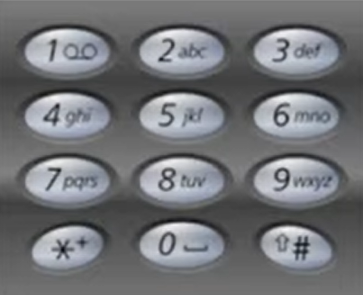

Example 1:

Input: digits = "34"

Output: ["dg","dh","di","eg","eh","ei","fg","fh","fi"]

Example 2:

Input: digits = ""

Output: []
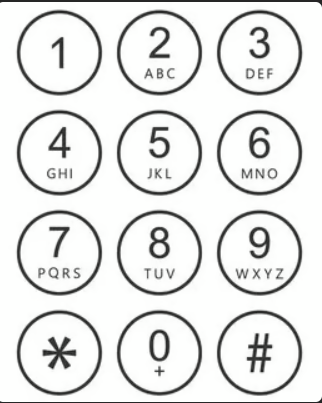

In [ ]:
# back tracking with time complexity = O(n*4^n) Space complexity= O(n) extra space.O(n*4^n) space for the output list.
class Solution:
    def letterCombinations(self,digits):
        res = []
        digitToChar = {
            "2":"abc",
            "3":"def",
            "4":"ghi",
            "5":"jkl",
            "6":"mno",
            "7":"pqrs",
            "8":"tuv",
            "9":"wxyz"}
        
        def backtrack(i,curstr):
            if len(digits) == len(curstr):
                res.append(curstr)
                return
            for c in digitToChar[digits[i]]:
                backtrack(i+1,curstr+c)
        
        if digits:
            backtrack(0,"")
        return res
c = Solution()
c.letterCombinations("49")

['gw', 'gx', 'gy', 'gz', 'hw', 'hx', 'hy', 'hz', 'iw', 'ix', 'iy', 'iz']

In [16]:
# iteration with time complexity = O(n*4^n) Space complexity= O(n) extra space.O(n*4^n) space for the output list.
class Solution:
    def letterCombinations(self, digits):
        if not digits:
            return []

        res = [""]
        digitToChar = {
            "2": "abc",
            "3": "def",
            "4": "ghi",
            "5": "jkl",
            "6": "mno",
            "7": "qprs",
            "8": "tuv",
            "9": "wxyz",
        }

        for digit in digits:
            tmp = []
            for curStr in res:
                for c in digitToChar[digit]:
                    tmp.append(curStr + c)
            res = tmp
        return res
c = Solution()
c.letterCombinations("49")

['gw', 'gx', 'gy', 'gz', 'hw', 'hx', 'hy', 'hz', 'iw', 'ix', 'iy', 'iz']